In [1]:
#Predicting house prices using Linear Regression and GBR. The tutorial and write up for the code can be found here https://medium.com/towards-data-science/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [3]:
HDB = pd.read_csv("/Users/paulinekoh/Desktop/DataScience/Project/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-march-2012-onwards.csv")

In [4]:
HDB.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
# create a new column for Price per sqm
HDB['resale_price_per_sqm'] = HDB.resale_price / HDB.floor_area_sqm
HDB.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_price_per_sqm
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,5555.555556
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,6022.727273
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,4632.352941
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,4776.119403
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,4791.044776


In [6]:
# remove the block column
HDB.drop('block', axis=1, inplace=True)

In [7]:
# remove the street_name column
HDB.drop('street_name', axis=1, inplace=True)

In [8]:
# map categorical data to numeric data
HDB['flat_type_num'] = HDB.flat_type.map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7})

In [9]:
#  using a lambda/ anonymous function to convert a column
HDB["lower_floor"] = HDB.storey_range.apply(lambda x: int(x.split(" ")[0]))

In [10]:
# having the upper storey in a separate column
def get_upper_story(s):
    return int(s.split(" ")[-1])

In [11]:
HDB["upper_floor"] = HDB.storey_range.apply(get_upper_story)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
HDB['flat_model_encode'] = encoder.fit_transform(HDB.flat_model)
HDB['town_encode'] = encoder.fit_transform(HDB.town)
HDB['year_month_encode'] = encoder.fit_transform(HDB.month)

In [13]:
HDB.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num,lower_floor,upper_floor,flat_model_encode,town_encode,year_month_encode
0,2012-03,ANG MO KIO,2 ROOM,06 TO 10,45.0,Improved,1986,250000.0,5555.555556,2,6,10,4,0,0
1,2012-03,ANG MO KIO,2 ROOM,01 TO 05,44.0,Improved,1980,265000.0,6022.727273,2,1,5,4,0,0
2,2012-03,ANG MO KIO,3 ROOM,06 TO 10,68.0,New Generation,1980,315000.0,4632.352941,3,6,10,11,0,0
3,2012-03,ANG MO KIO,3 ROOM,01 TO 05,67.0,New Generation,1984,320000.0,4776.119403,3,1,5,11,0,0
4,2012-03,ANG MO KIO,3 ROOM,06 TO 10,67.0,New Generation,1980,321000.0,4791.044776,3,6,10,11,0,0


In [14]:
HDB.town.value_counts()

JURONG WEST        8270
WOODLANDS          8042
TAMPINES           7323
SENGKANG           6668
BEDOK              6592
YISHUN             6538
HOUGANG            5216
ANG MO KIO         5014
CHOA CHU KANG      4320
BUKIT BATOK        4127
BUKIT MERAH        4016
PUNGGOL            3701
BUKIT PANJANG      3562
PASIR RIS          3379
TOA PAYOH          3236
KALLANG/WHAMPOA    3098
GEYLANG            2888
QUEENSTOWN         2767
SEMBAWANG          2566
CLEMENTI           2526
JURONG EAST        2337
SERANGOON          2245
BISHAN             1896
CENTRAL AREA        849
MARINE PARADE       704
BUKIT TIMAH         220
Name: town, dtype: int64

In [15]:
HDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102100 entries, 0 to 102099
Data columns (total 15 columns):
month                   102100 non-null object
town                    102100 non-null object
flat_type               102100 non-null object
storey_range            102100 non-null object
floor_area_sqm          102100 non-null float64
flat_model              102100 non-null object
lease_commence_date     102100 non-null int64
resale_price            102100 non-null float64
resale_price_per_sqm    102100 non-null float64
flat_type_num           102100 non-null int64
lower_floor             102100 non-null int64
upper_floor             102100 non-null int64
flat_model_encode       102100 non-null int64
town_encode             102100 non-null int64
year_month_encode       102100 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 11.7+ MB


What are the average Floor Area Sqm, Lease commence_date and Resale_Price?

In [16]:
HDB.groupby('town').mean()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num,lower_floor,upper_floor,flat_model_encode,town_encode,year_month_encode
town,,,,,,,,,,
ANG MO KIO,82.102712,1981.983646,418629.835860,5063.686140,3.481053,6.659354,8.790586,9.732948,0.0,31.585361
BEDOK,87.164290,1983.121663,420083.763501,4837.048070,3.739836,6.383343,8.500152,8.822664,1.0,31.280492
BISHAN,105.579641,1989.078059,603194.968755,5708.664891,4.332806,6.791667,8.919304,8.354958,2.0,32.715190
BUKIT BATOK,91.578386,1988.440998,406086.975042,4439.294708,3.840804,6.383087,8.529925,8.536952,3.0,30.830870
BUKIT MERAH,84.999502,1987.553536,549422.586624,6428.789365,3.688496,9.176544,11.334412,7.959661,4.0,31.214392
BUKIT PANJANG,104.700730,1995.901179,436063.313869,4175.279812,4.412409,8.154688,10.279337,7.810219,5.0,32.169568
BUKIT TIMAH,107.859091,1983.163636,686751.436364,6342.467316,4.409091,6.954545,9.100000,6.386364,6.0,34.118182
CENTRAL AREA,79.230860,1989.444052,594591.738516,7365.396072,3.553592,14.538280,16.623086,9.325088,7.0,36.226148
CHOA CHU KANG,111.090741,1995.334954,424124.816843,3825.065295,4.482407,6.871991,9.029861,6.931713,8.0,31.976389


In [17]:
HDB.groupby('flat_type').mean()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num,lower_floor,upper_floor,flat_model_encode,town_encode,year_month_encode
flat_type,,,,,,,,,,
1 ROOM,31.000000,1975.000000,222661.016949,7182.613450,1.0,5.271186,7.271186,4.000000,4.000000,28.237288
2 ROOM,45.454376,1979.084730,259146.787709,5724.624586,2.0,5.895717,8.020484,10.319367,10.952514,31.326816
3 ROOM,68.219060,1981.030000,338317.520624,4976.865864,3.0,5.949035,8.081173,8.935396,11.463390,30.831060
4 ROOM,96.012468,1993.427552,447501.736135,4692.966447,4.0,7.072952,9.205082,9.004895,14.205696,32.281108
5 ROOM,118.534178,1995.683519,535919.387414,4532.330189,5.0,8.003051,10.138916,6.028097,14.622961,31.740942
EXECUTIVE,143.841397,1994.107980,633405.516678,4405.971923,6.0,6.196384,8.341521,4.728803,15.117581,30.682294
MULTI-GENERATION,157.846154,1987.153846,769418.769231,4889.045202,7.0,5.269231,7.730769,10.000000,19.000000,17.807692


In [18]:
HDB.describe()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num,lower_floor,upper_floor,flat_model_encode,town_encode,year_month_encode
count,102100.000000,102100.000000,1.021000e+05,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000
mean,96.617284,1990.358364,4.498540e+05,4725.349432,4.085436,6.889608,9.023555,7.972693,13.564897,31.607483
std,24.584306,10.639069,1.310726e+05,1006.667181,0.931864,5.190660,5.183719,3.816402,8.135275,19.692251
min,31.000000,1966.000000,1.750000e+05,2375.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,74.000000,1983.000000,3.550000e+05,4047.619048,3.000000,4.000000,6.000000,4.000000,7.000000,13.000000
50%,95.000000,1988.000000,4.250000e+05,4527.027027,4.000000,7.000000,9.000000,7.000000,13.000000,33.000000
75%,111.000000,1999.000000,5.150000e+05,5142.857143,5.000000,10.000000,12.000000,11.000000,21.000000,49.000000
max,280.000000,2015.000000,1.180000e+06,10645.161290,7.000000,49.000000,51.000000,19.000000,25.000000,64.000000


In [19]:
HDB[['resale_price','town']].groupby('town').resale_price.mean().sort_values(ascending=False).head(5)

town
BUKIT TIMAH      686751.436364
BISHAN           603194.968755
CENTRAL AREA     594591.738516
BUKIT MERAH      549422.586624
MARINE PARADE    548716.566761
Name: resale_price, dtype: float64

In [20]:
# count the number of HDB sold in each town
HDB.town.value_counts()

JURONG WEST        8270
WOODLANDS          8042
TAMPINES           7323
SENGKANG           6668
BEDOK              6592
YISHUN             6538
HOUGANG            5216
ANG MO KIO         5014
CHOA CHU KANG      4320
BUKIT BATOK        4127
BUKIT MERAH        4016
PUNGGOL            3701
BUKIT PANJANG      3562
PASIR RIS          3379
TOA PAYOH          3236
KALLANG/WHAMPOA    3098
GEYLANG            2888
QUEENSTOWN         2767
SEMBAWANG          2566
CLEMENTI           2526
JURONG EAST        2337
SERANGOON          2245
BISHAN             1896
CENTRAL AREA        849
MARINE PARADE       704
BUKIT TIMAH         220
Name: town, dtype: int64

In [21]:
# count the number of HDB sold in each town
HDB.flat_type.value_counts()

4 ROOM              40657
3 ROOM              28667
5 ROOM              23597
EXECUTIVE            8020
2 ROOM               1074
1 ROOM                 59
MULTI-GENERATION       26
Name: flat_type, dtype: int64

In [22]:
# count the number of HDB sold in each town
HDB.storey_range.value_counts()

04 TO 06    23393
07 TO 09    20852
01 TO 03    19045
10 TO 12    17867
13 TO 15     7614
16 TO 18     3121
01 TO 05     2700
06 TO 10     2474
19 TO 21     1355
11 TO 15     1259
22 TO 24      880
25 TO 27      462
28 TO 30      292
16 TO 20      265
34 TO 36      112
37 TO 39       98
31 TO 33       98
21 TO 25       92
40 TO 42       47
26 TO 30       39
46 TO 48       12
43 TO 45        9
36 TO 40        7
49 TO 51        5
31 TO 35        2
Name: storey_range, dtype: int64

In [23]:
# count the number of HDB sold in each town
HDB.flat_model.value_counts()

Model A                   29394
Improved                  26384
New Generation            17907
Premium Apartment          9497
Simplified                 5609
Apartment                  4077
Standard                   3721
Maisonette                 2829
Model A2                   1583
DBSS                        427
Type S1                     175
Model A-Maisonette          160
Adjoined flat               154
Type S2                      68
Terrace                      65
Multi Generation             26
Improved-Maisonette          12
Premium Maisonette            6
Premium Apartment Loft        5
2-room                        1
Name: flat_model, dtype: int64

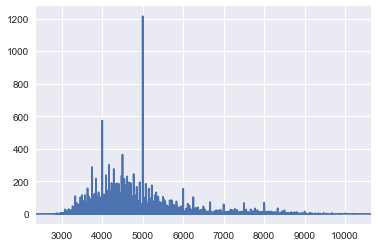

In [24]:
# compare with line plot
HDB.resale_price_per_sqm.value_counts().sort_index().plot()

<function seaborn.utils.despine>

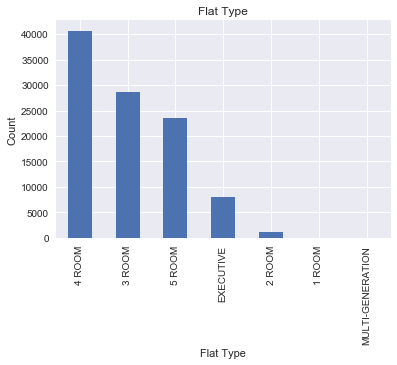

In [25]:
HDB['flat_type'].value_counts().plot(kind='bar')
plt.title('Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Count')
sns.despine

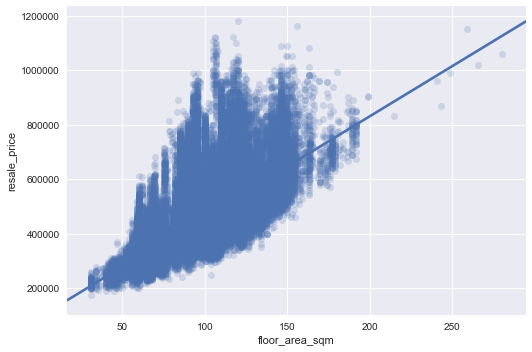

In [26]:
# Seaborn scatter plot with regression line
sns.lmplot(x='floor_area_sqm', y='resale_price', data=HDB, aspect=1.5, scatter_kws={'alpha':0.2})

In [27]:
feature_cols = ['floor_area_sqm']
X = HDB[feature_cols]
y = HDB.resale_price

In [28]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# print the coefficients
print linreg.intercept_
print linreg.coef_#Every 1 floor area sqm increase = S$3677 increase in resale price

94554.1342589
[ 3677.39452962]


Using the model for prediction
How much will a HDB cost if the the floor area is 121?

In [30]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*121

array([ 539518.87234259])

In [31]:
# use the predict method
linreg.predict(121)

array([ 539518.87234259])

In [32]:
# correlation matrix (ranges from 1 to -1)
HDB.corr()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num,lower_floor,upper_floor,flat_model_encode,town_encode,year_month_encode
floor_area_sqm,1.000000,0.427374,0.689742,-0.270585,0.946994,0.046285,0.046911,-0.393049,0.145043,0.006298
lease_commence_date,0.427374,1.000000,0.384532,-0.000910,0.474105,0.232788,0.231363,-0.164454,0.219050,0.085741
resale_price,0.689742,0.384532,1.000000,0.492346,0.693413,0.335483,0.336911,-0.268852,-0.036713,-0.089542
resale_price_per_sqm,-0.270585,-0.000910,0.492346,1.000000,-0.203143,0.390151,0.391758,0.082864,-0.211929,-0.145104
flat_type_num,0.946994,0.474105,0.693413,-0.203143,1.000000,0.089932,0.090753,-0.357189,0.152252,0.005706
lower_floor,0.046285,0.232788,0.335483,0.390151,0.089932,1.000000,0.995356,-0.059441,-0.052503,0.083789
upper_floor,0.046911,0.231363,0.336911,0.391758,0.090753,0.995356,1.000000,-0.059292,-0.052248,0.043731
flat_model_encode,-0.393049,-0.164454,-0.268852,0.082864,-0.357189,-0.059441,-0.059292,1.000000,-0.094086,-0.008490
town_encode,0.145043,0.219050,-0.036713,-0.211929,0.152252,-0.052503,-0.052248,-0.094086,1.000000,-0.006319
year_month_encode,0.006298,0.085741,-0.089542,-0.145104,0.005706,0.083789,0.043731,-0.008490,-0.006319,1.000000


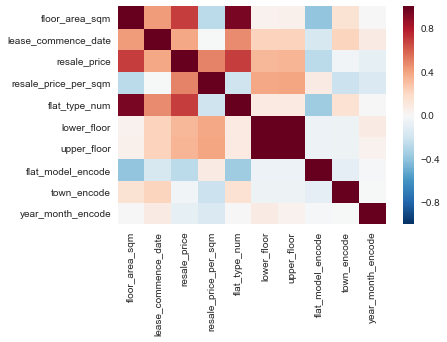

In [33]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(HDB.corr())

In [34]:
# create a list of features
feature_cols = ['floor_area_sqm', 'flat_type_num', 'lease_commence_date']

In [35]:
# create X and y
X = HDB[feature_cols]
y = HDB.resale_price

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

-1911705.13543
[  1799.92859868  47138.81936542   1002.36838859]


In [36]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('floor_area_sqm', 1799.9285986764403),
 ('flat_type_num', 47138.819365423369),
 ('lease_commence_date', 1002.368388585091)]

Interpreting the coefficients:
Holding all other features fixed, a 1 sqm increase in floor_area_sqm is associated with a resale price increase of S$1799.92.
Holding all other features fixed, an improvement in flat type is associated with a resale price increase of S$47138.
Holding all other features fixed, a year decrease in lease_commence_period is associated with a resale price increase of S$1002.